In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
num_cities = 10
cities = np.random.rand(num_cities, 2) * 100

def calc_distance_matrix(cities):
    num = len(cities)
    matrix = np.zeros((num, num))
    for i in range(num):
        for j in range(num):
            if i != j:
                matrix[i][j] = np.linalg.norm(cities[i] - cities[j])
    return matrix

distance_matrix = calc_distance_matrix(cities)

In [3]:
# Genetic Algorithm Functions
def total_distance(route):
    return sum(distance_matrix[route[i], route[i+1]] for i in range(len(route)-1)) + \
           distance_matrix[route[-1], route[0]]

def create_population(pop_size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(pop_size)]

def selection(population):
    return sorted(population, key=total_distance)[:2]

def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [-1]*size
    child[start:end] = parent1[start:end]
    ptr = 0
    for city in parent2:
        if city not in child:
            while child[ptr] != -1:
                ptr += 1
            child[ptr] = city
    return child

def mutate(route, mutation_rate=0.01):
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route)-1)
            route[i], route[j] = route[j], route[i]
    return route

def evolve_population(population):
    new_pop = []
    parents = selection(population)
    for _ in range(len(population)):
        child = crossover(parents[0], parents[1])
        new_pop.append(mutate(child))
    return new_pop

In [4]:
#Run Genetic Algorithm

population_size = 100
generations = 200
population = create_population(population_size, num_cities)
best_distances = []

for gen in range(generations):
    population = evolve_population(population)
    best_distances.append(total_distance(selection(population)[0]))

best_route_ga = selection(population)[0]
best_distance_ga = total_distance(best_route_ga)
print('Best GA Route:', best_route_ga)
print('Best GA Distance:', best_distance_ga)


Best GA Route: [6, 5, 8, 9, 4, 2, 3, 1, 0, 7]
Best GA Distance: 333.30066461708657


In [5]:
# Simulated Annealing Functions

import math

def swap_cities(route):
    new_route = route.copy()
    i, j = random.sample(range(len(route)), 2)
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

def simulated_annealing(initial_route, initial_temp, cooling_rate, stopping_temp):
    current_route = initial_route
    current_distance = total_distance(current_route)
    temp = initial_temp
    best_route = current_route
    best_distance = current_distance
    history = [current_distance]

    while temp > stopping_temp:
        new_route = swap_cities(current_route)
        new_distance = total_distance(new_route)
        delta = new_distance - current_distance

        if delta < 0 or random.random() < math.exp(-delta / temp):
            current_route = new_route
            current_distance = new_distance
            if new_distance < best_distance:
                best_route = new_route
                best_distance = new_distance
        temp *= cooling_rate
        history.append(best_distance)

    return best_route, best_distance, history

In [6]:
# Run Simulated Annealing

initial_route = random.sample(range(num_cities), num_cities)
best_route_sa, best_distance_sa, sa_history = simulated_annealing(
    initial_route, 1000, 0.995, 1e-3)

print('Best SA Route:', best_route_sa)
print('Best SA Distance:', best_distance_sa)

Best SA Route: [4, 2, 3, 6, 7, 1, 0, 5, 8, 9]
Best SA Distance: 317.3503375583497


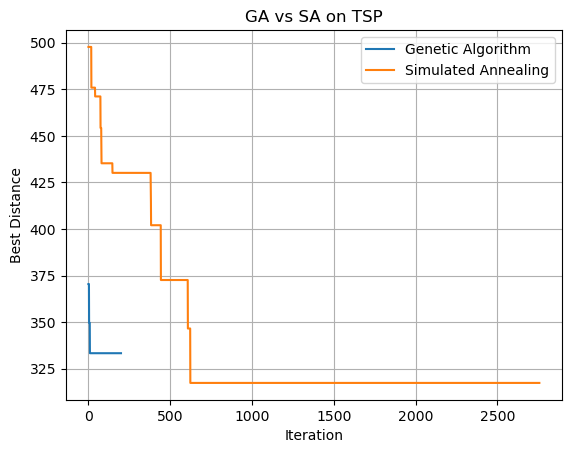

In [7]:
# Comparison Plot
plt.plot(best_distances, label='Genetic Algorithm')
plt.plot(sa_history, label='Simulated Annealing')
plt.xlabel('Iteration')
plt.ylabel('Best Distance')
plt.title('GA vs SA on TSP')
plt.legend()
plt.grid(True)
plt.show()
